# **Cryptocurrency Trading Algorithm**


In [1]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 5.2 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24109 sha256=a55a99ef03201c6df8dd34c086d314ca80c851cd0c6c9809d8bebca6835da4a4
  Stored in directory: /root/.cache/pip/wheels/86/fe/9b/a4d3d78796b699e37065e5b6c27b75cff448ddb8b24943c288
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter

***


In [3]:

BTC_USD = yf.download("BTC-USD", start='2020-01-01', end='2020-12-31', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [4]:

BTC_USD.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095


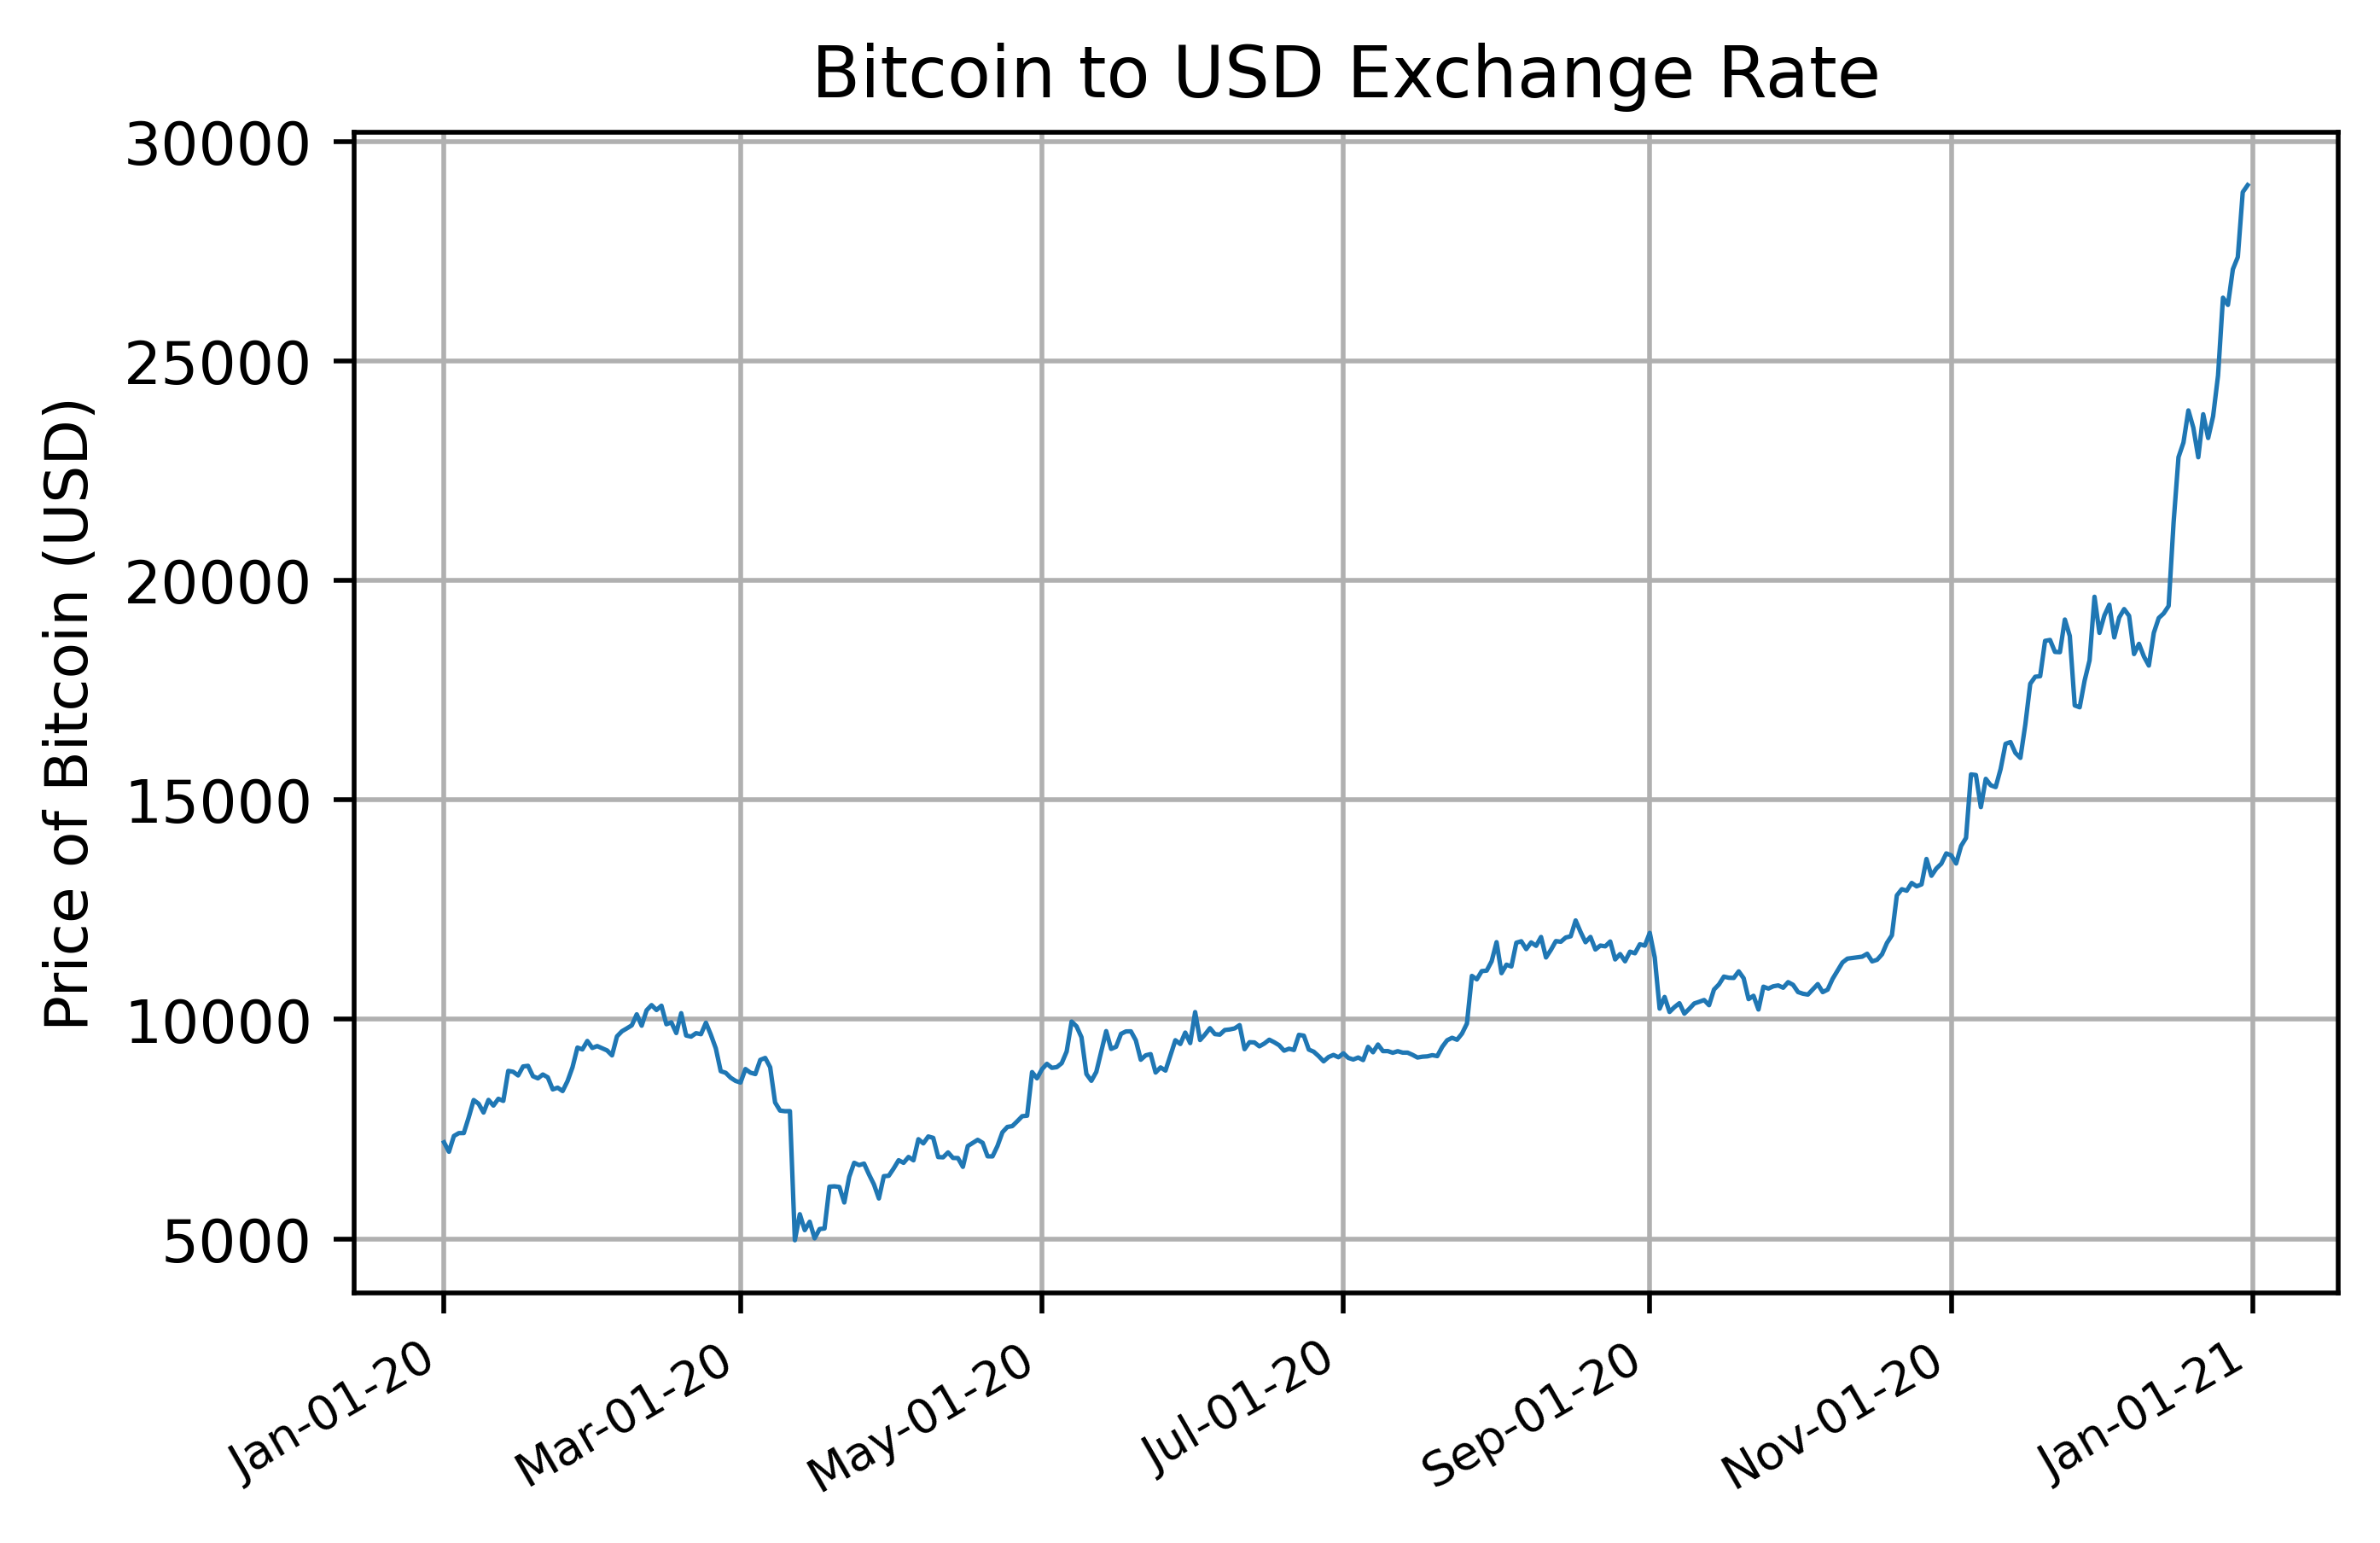

In [5]:
fig, ax = plt.subplots(dpi=500)


date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()


ax.plot(BTC_USD['Close'], lw=0.75)


ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() 
plt.show()

In [6]:

BTC_USD['SMA_9'] = BTC_USD['Close'].rolling(window=9, min_periods=1).mean()

In [7]:

BTC_USD['SMA_30'] = BTC_USD['Close'].rolling(window=30, min_periods=1).mean()

In [8]:

BTC_USD.tail()

,Open,High,Low,Close,Adj Close,Volume,SMA_9,SMA_30
Date,,,,,,,,
2020-12-27,26439.373047,28288.839844,25922.769531,26272.294922,26272.294922,66479895605,24253.850694,20823.602148
2020-12-28,26280.822266,27389.111328,26207.640625,27084.808594,27084.808594,49056742893,24611.070312,21135.848633
2020-12-29,27081.810547,27370.720703,25987.298828,27362.437500,27362.437500,45265946774,25042.752821,21442.013737
2020-12-30,27360.089844,28937.740234,27360.089844,28840.953125,28840.953125,51287442704,25713.627387,21749.184310
2020-12-31,28841.574219,29244.876953,28201.992188,29001.720703,29001.720703,46754964848,26293.481988,22089.141732


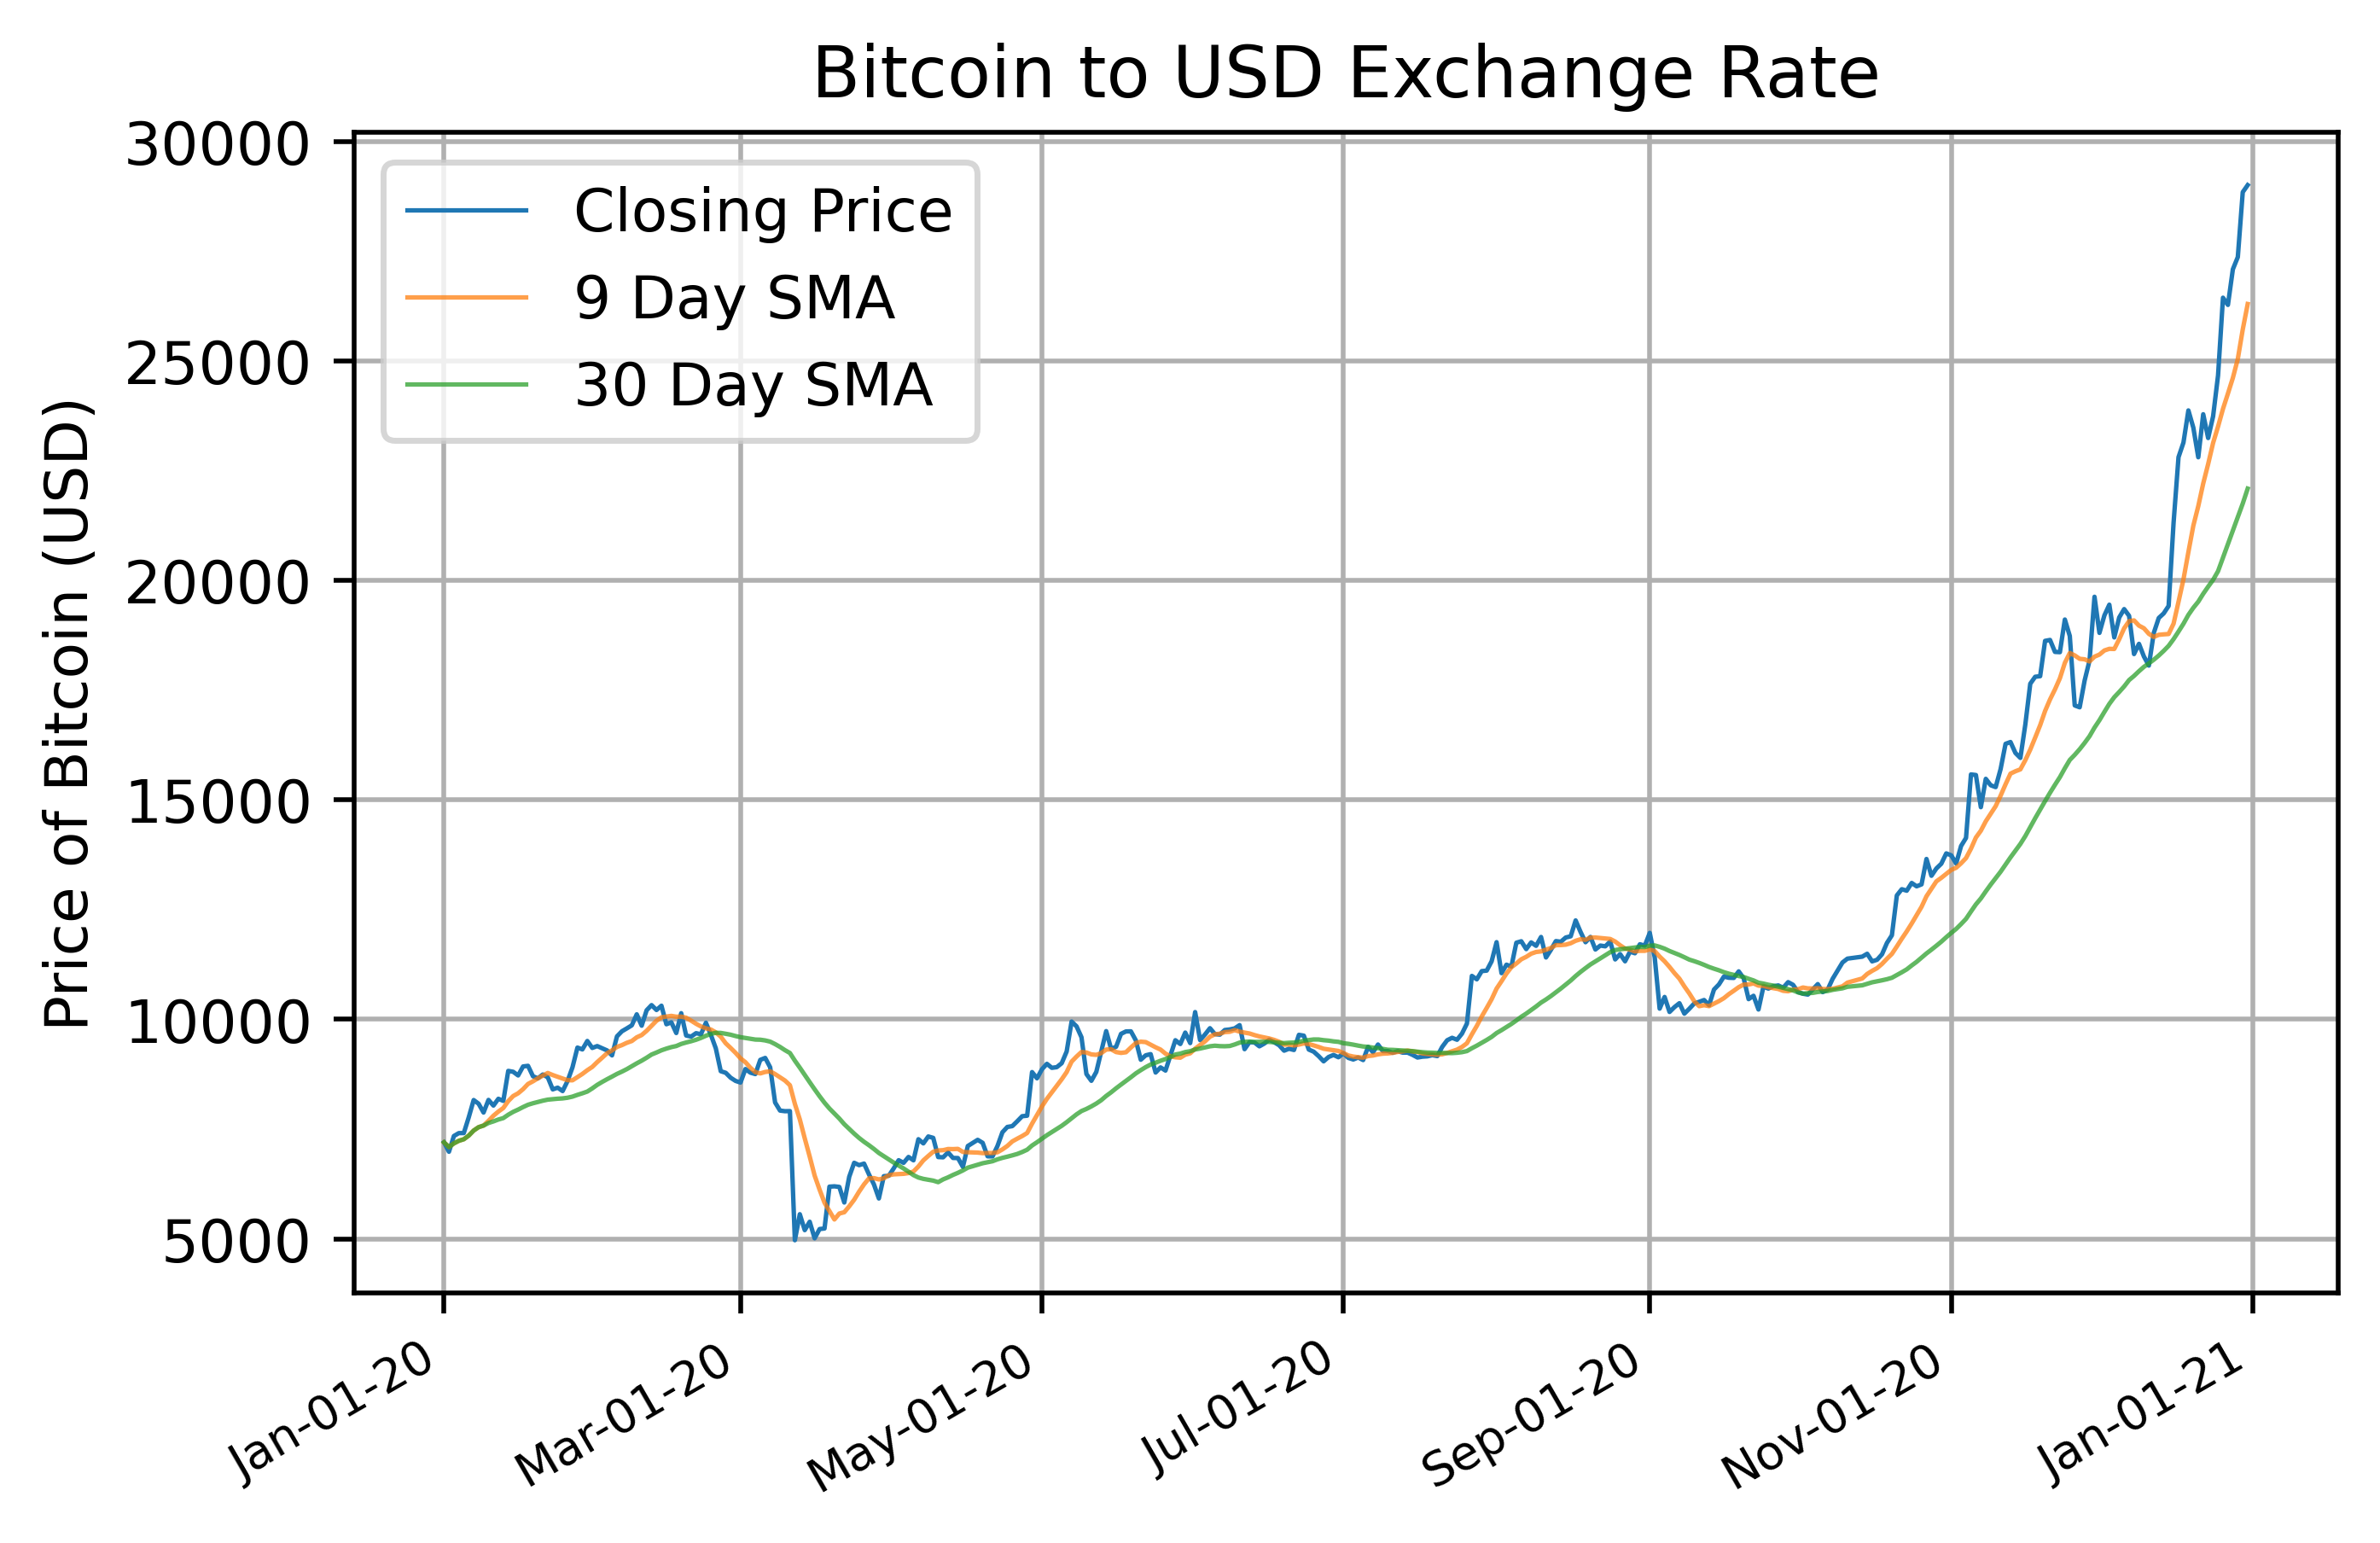

In [9]:
fig, ax = plt.subplots(dpi=500)

date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()


ax.plot(BTC_USD['Close'], lw=0.75, label='Closing Price') 

ax.plot(BTC_USD['SMA_9'], lw=0.75, alpha=0.75, label='9 Day SMA')
ax.plot(BTC_USD['SMA_30'], lw=0.75, alpha=0.75, label='30 Day SMA')


ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() 
ax.legend()
plt.show()

In [10]:

trade_signals = pd.DataFrame(index=BTC_USD.index)


short_interval = 10
long_interval = 40
trade_signals['Short'] = BTC_USD['Close'].rolling(window=short_interval, min_periods=1).mean()
trade_signals['Long'] = BTC_USD['Close'].rolling(window=long_interval, min_periods=1).mean()

In [12]:

trade_signals['Signal'] = 0.0
trade_signals['Signal'] = np.where(trade_signals['Short'] > trade_signals['Long'], 1.0, 0.0)   

In [13]:

trade_signals['Position'] = trade_signals['Signal'].diff()

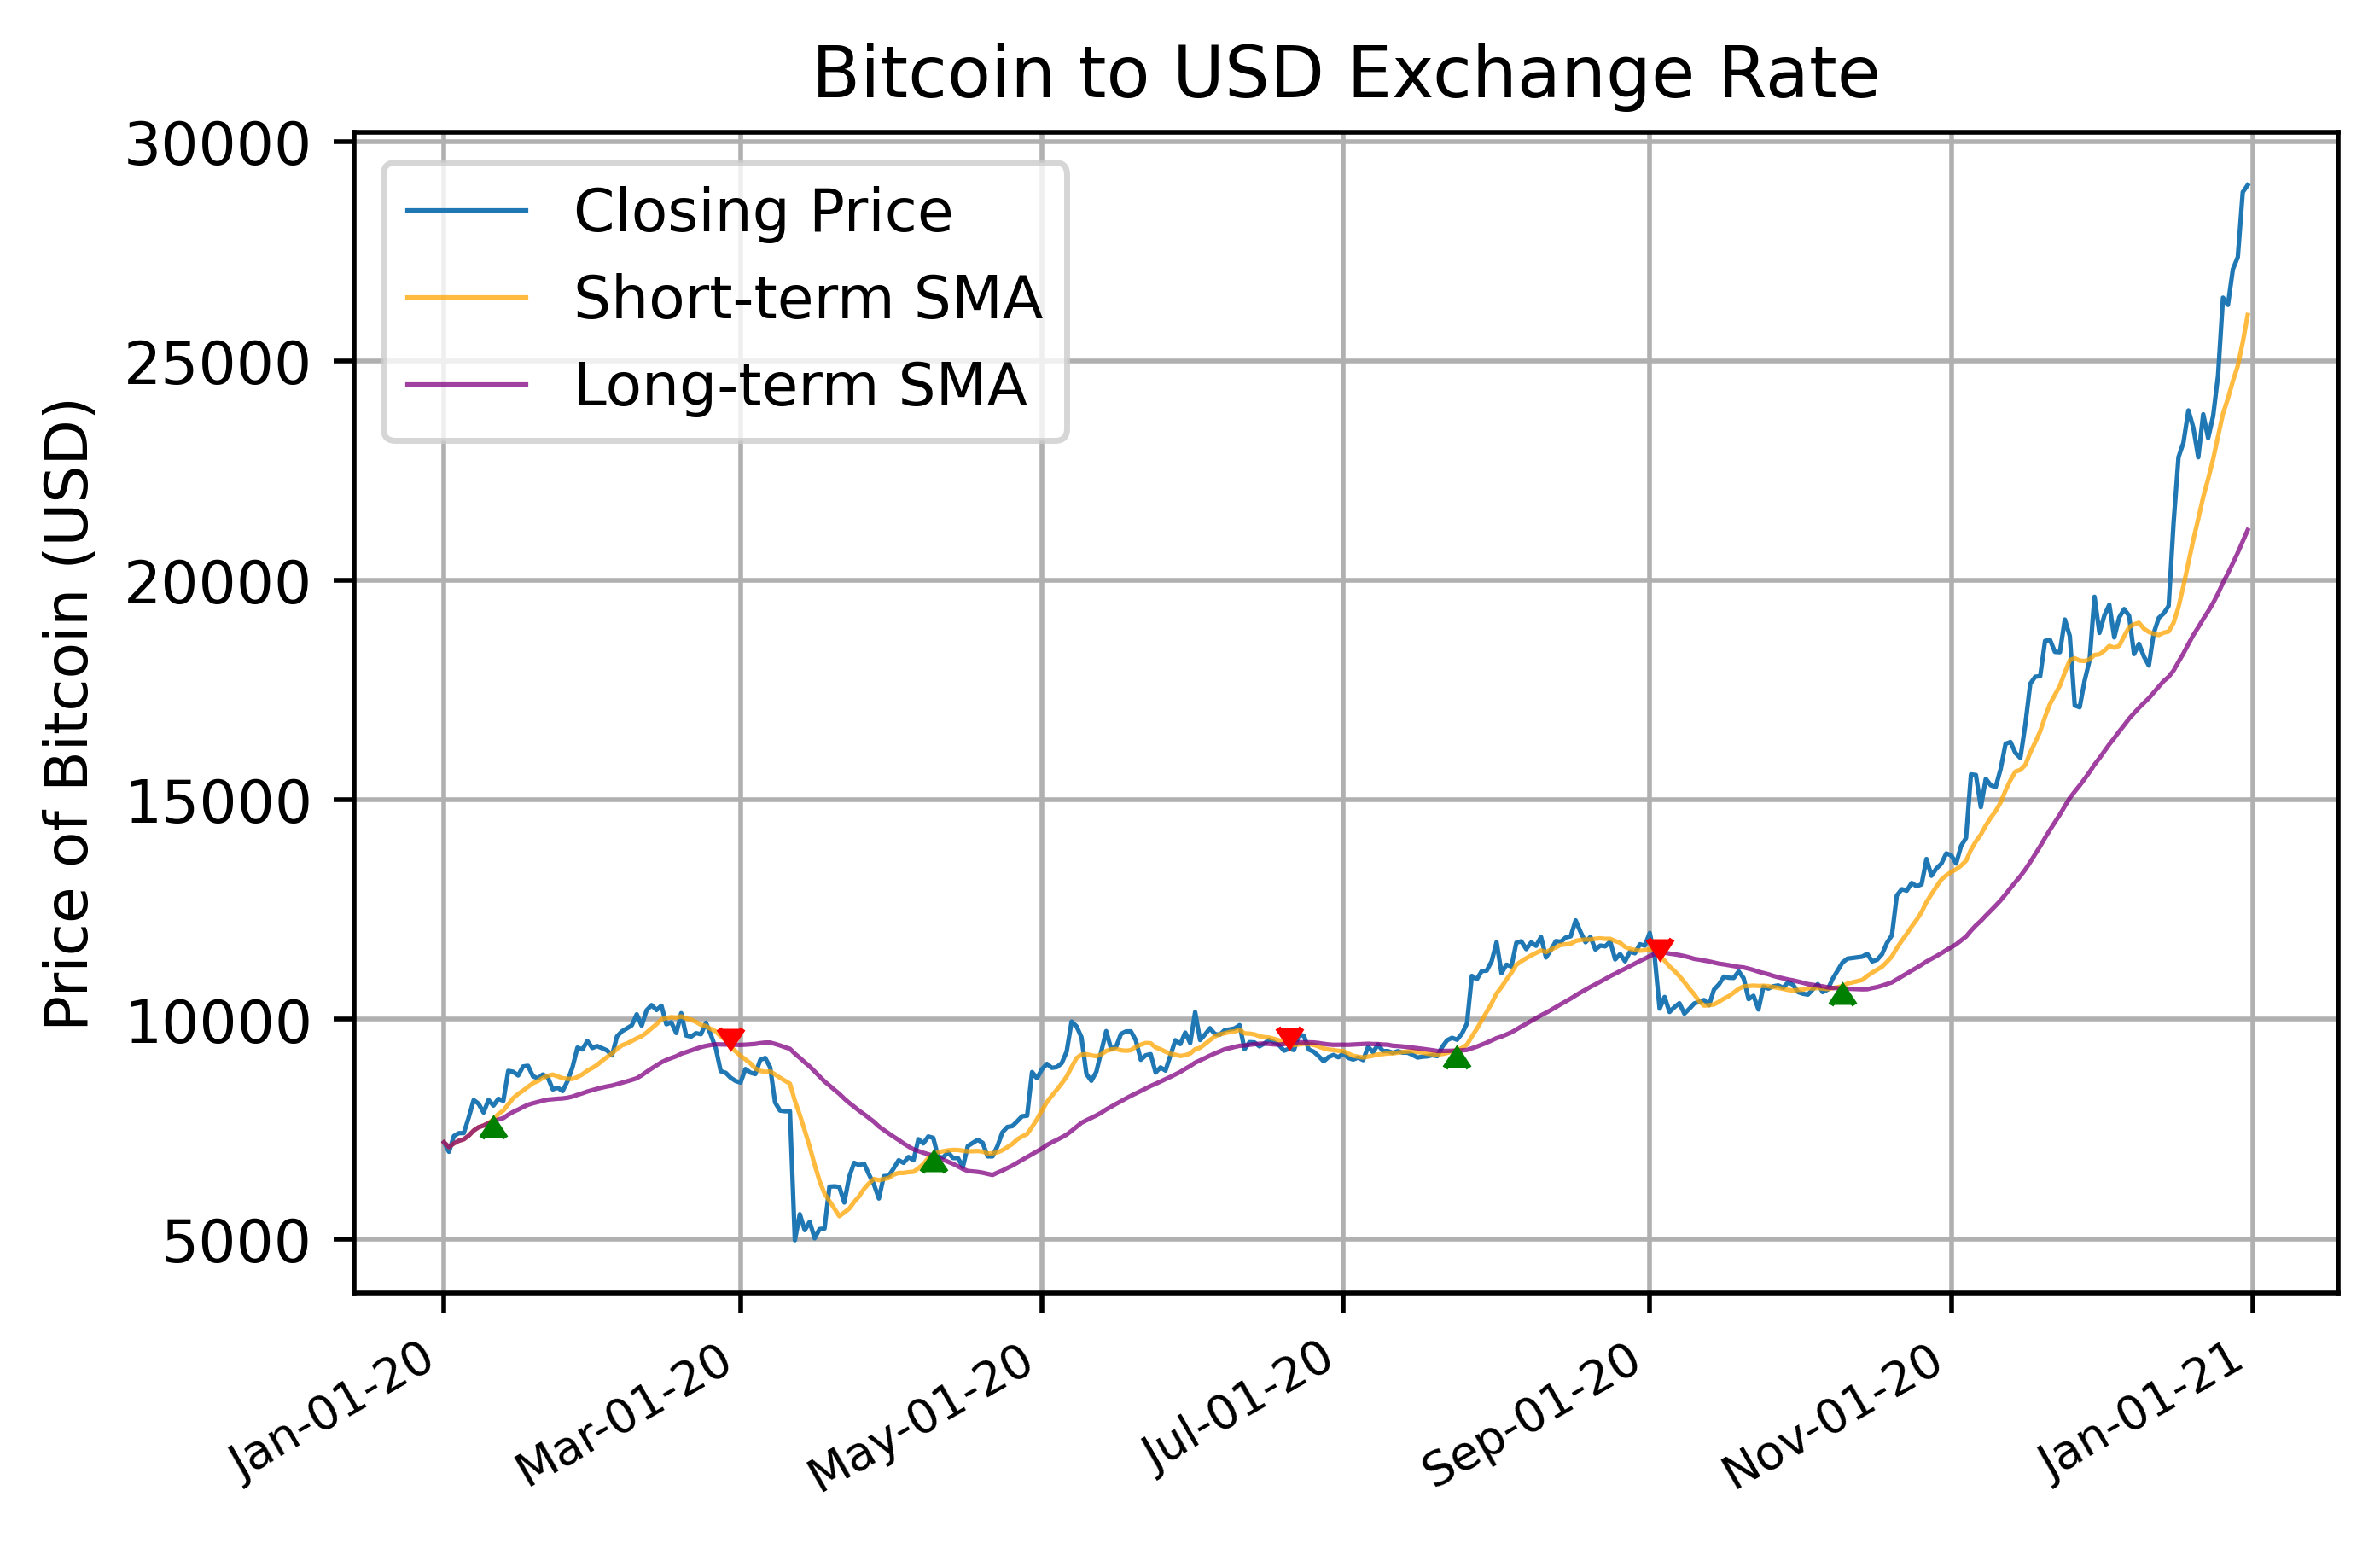

In [14]:
fig, ax = plt.subplots(dpi=500)

date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()


ax.plot(BTC_USD['Close'], lw=0.75, label='Closing Price')

ax.plot(trade_signals['Short'], lw=0.75, alpha=0.75, color='orange', label='Short-term SMA')

ax.plot(trade_signals['Long'], lw=0.75, alpha=0.75, color='purple', label='Long-term SMA')


ax.plot(trade_signals.loc[trade_signals['Position']==1.0].index, trade_signals.Short[trade_signals['Position'] == 1.0],
 marker=6, ms=4, linestyle='none', color='green')

ax.plot(trade_signals.loc[trade_signals['Position'] == -1.0].index, trade_signals.Short[trade_signals['Position'] == -1.0],
 marker=7, ms=4, linestyle='none', color='red')


ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() 
ax.legend() 
plt.show()

In [15]:

initial_balance = 10000.0


backtest = pd.DataFrame(index=trade_signals.index)


backtest['BTC_Return'] = BTC_USD['Close'] / BTC_USD['Close'].shift(1) 


In [16]:


backtest['Alg_Return'] = np.where(trade_signals.Signal == 1, backtest.BTC_Return, 1.0)


backtest['Balance'] = initial_balance * backtest.Alg_Return.cumprod()

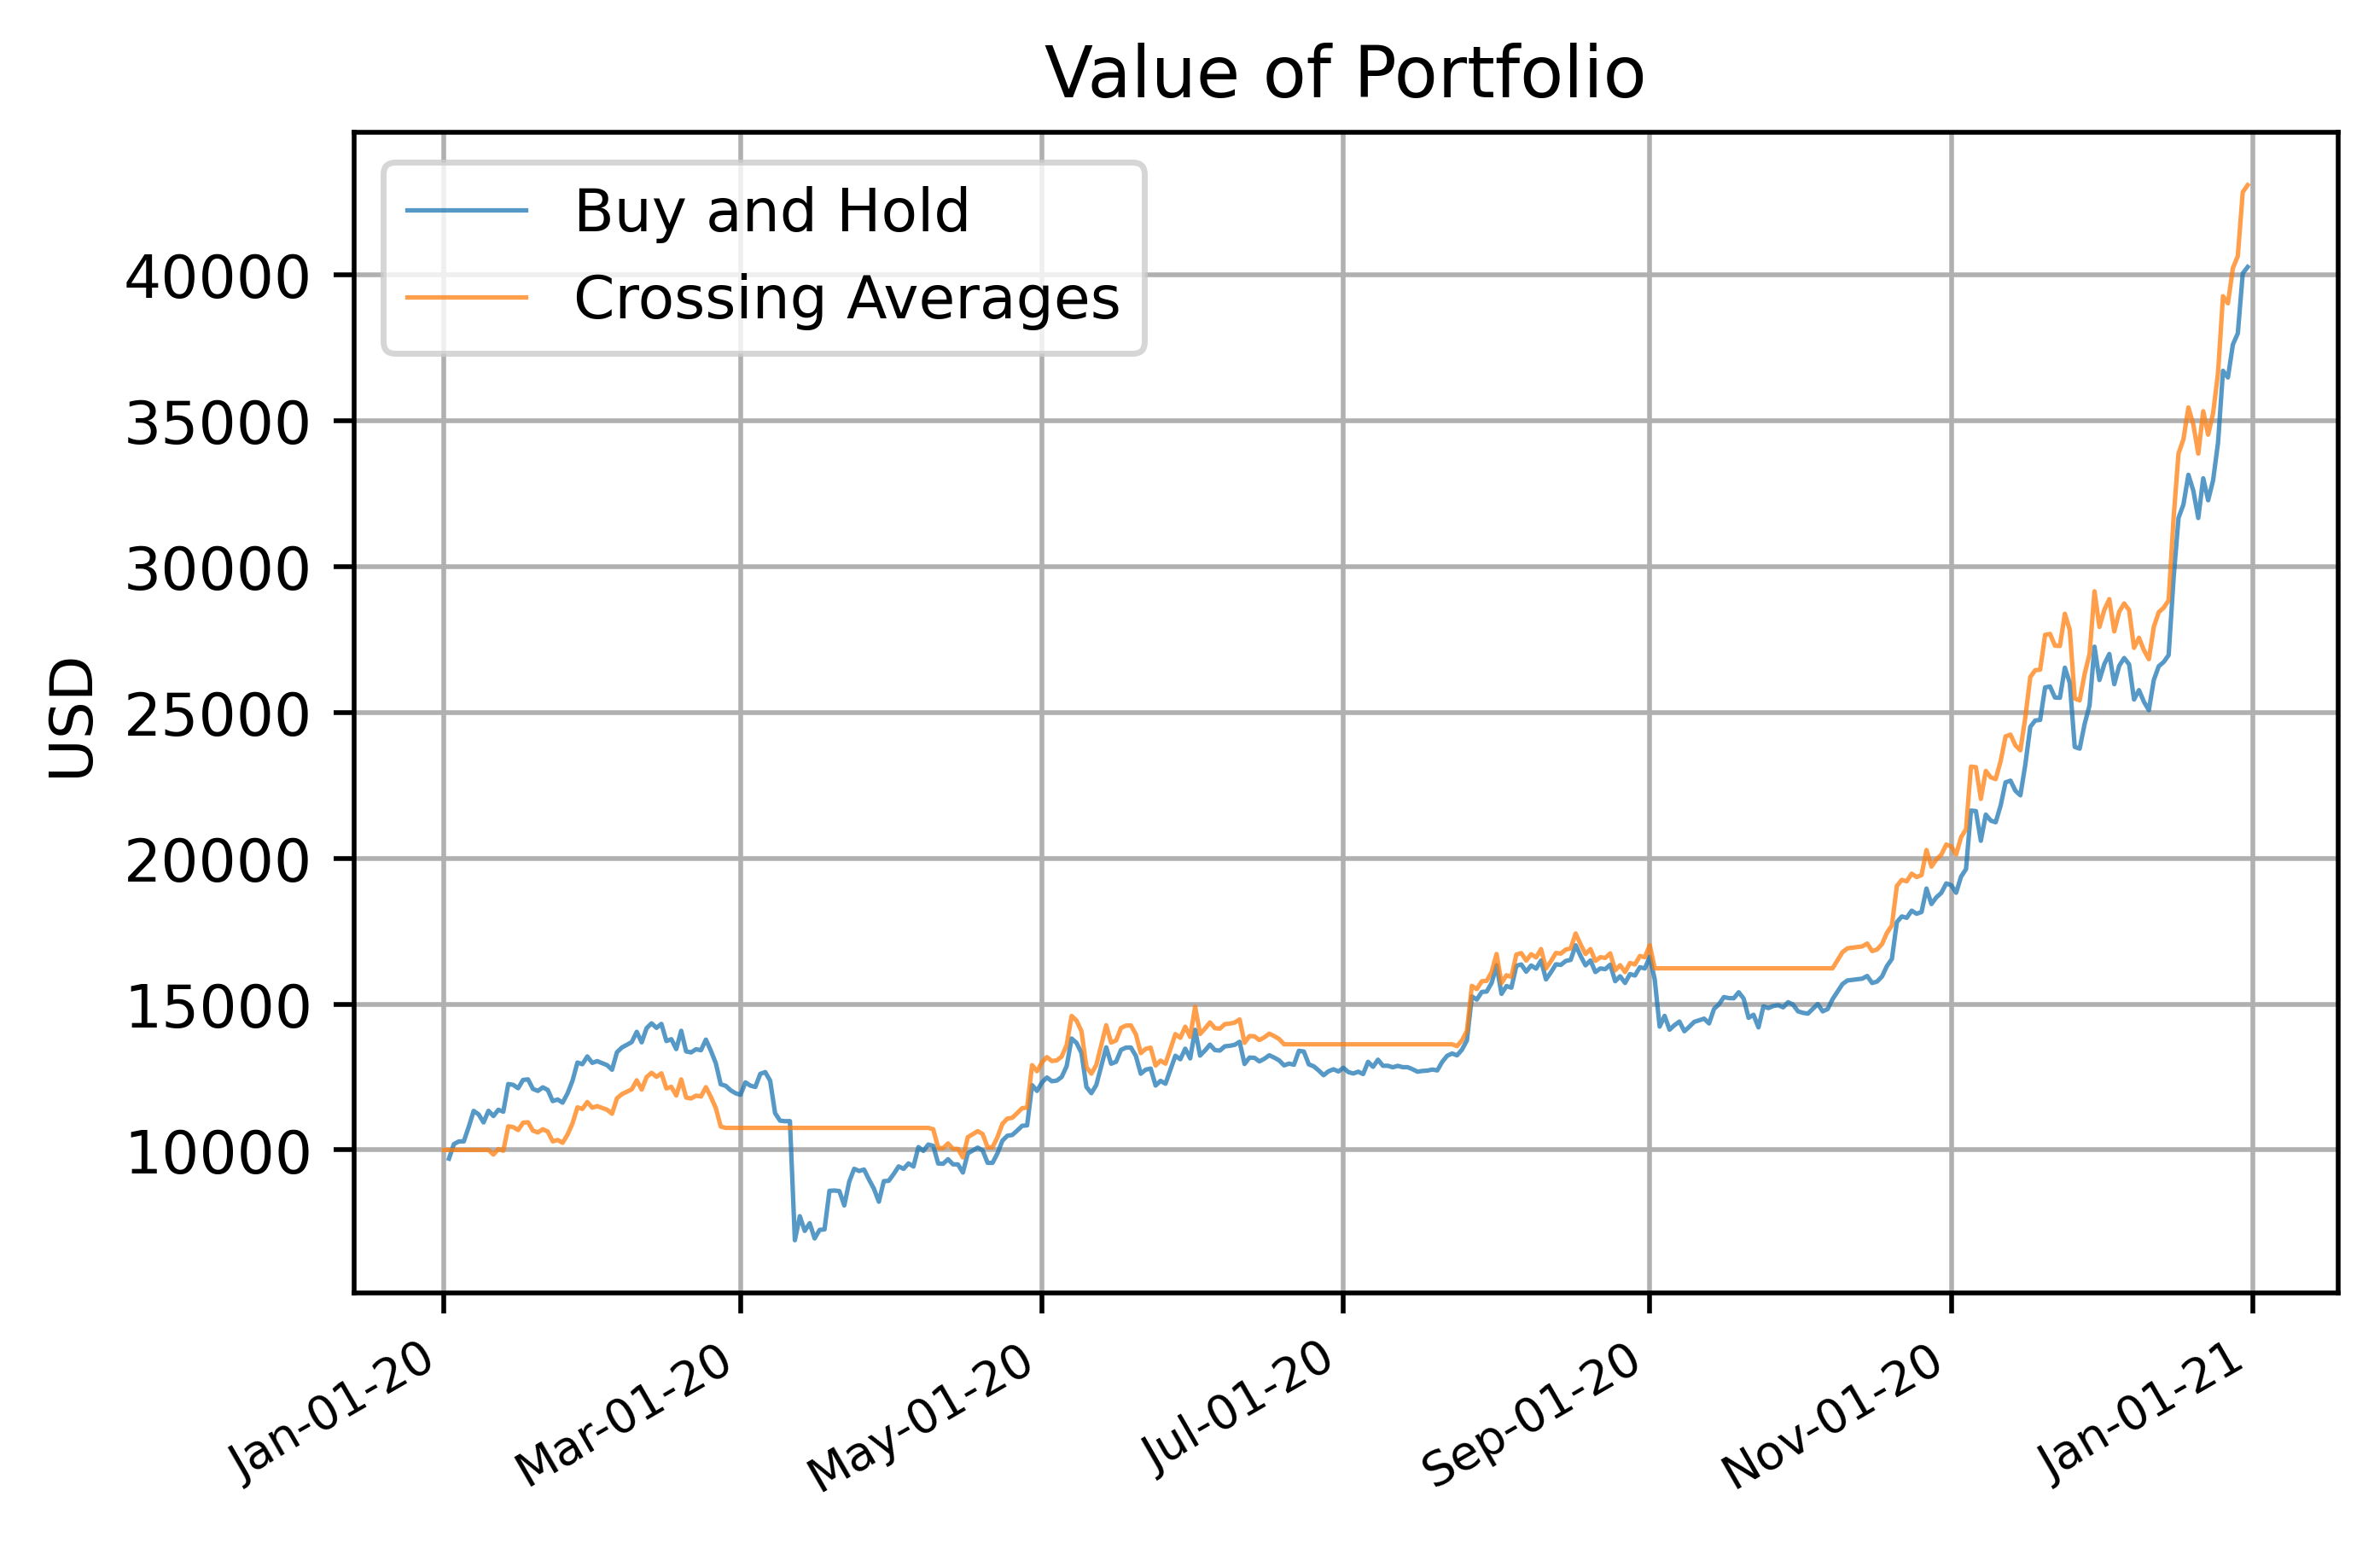

In [17]:
fig, ax = plt.subplots(dpi=500)


date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()


ax.plot(initial_balance*backtest.BTC_Return.cumprod(), lw=0.75, alpha=0.75, label='Buy and Hold')

ax.plot(backtest['Balance'], lw=0.75, alpha=0.75, label='Crossing Averages')


ax.set_ylabel('USD')
ax.set_title('Value of Portfolio')
ax.grid() 
ax.legend()


plt.show()

In [18]:
BTC_USD = yf.download("BTC-USD", start='2018-01-01', end='2019-12-31', interval='1d')

[*********************100%***********************]  1 of 1 completed
